## Final Project Submission

Please fill out:
* Student name: Felix Muriithi
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Antonny Muiko
* Blog post URL:


# Business Understanding
Many features of a property affect their prices .We need to determine what physical aspect of the property in King County region on how they affect their prices of the .The main purpose is to predict salesprice of property based on its features.This information can be used by homeowners,real estate agents and real estate brokers to predict the price of the property based on its features .Homeowners can use it to assess the value of their property and to determine its price.

# Data Understanding


In [1]:
#loading and importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Viewing the contents of the data
house_data=pd.read_csv('kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#viewing how many rows and columns are there
house_data.shape

(21597, 21)

In [4]:
#checking the datatype and number of entries of each column
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#Viewing the columns of the data
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
#Viewing the summary statistics
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### observation
The largest property has 33 bedrooms.

The oldest house was built in 1900

The property with the highest floors has 3.5 floors

# Data Cleaning

In [7]:
#identify missing values
missingval=house_data.isnull().sum().sort_values(ascending=False)
#identify percentage of missing values to the total data
percentage_of_missing_val=(house_data.isnull().sum()/len(house_data)).sort_values(ascending=False)


In [8]:
#Handling missing data
#Three columns have missing values
#Replacing missing values in waterfront with none to show no presence of water body on the property
house_data['waterfront']=house_data['waterfront'].fillna('No')
#Replacing missing values in view with none to show no presence of views on the property
house_data['view']=house_data['view'].fillna('NONE')
#Replacing missing values in yr_renovated with 0 to show there was no renovations on the property
house_data['yr_renovated']=house_data['yr_renovated'].fillna(0)


In [9]:
#checking if rows are duplicated
house_data.duplicated().sum()

0

##### observation
There are no duplicates

In [10]:
#droping the columns that we wont check the outliers
rel_house_data=house_data.drop(['id', 'date','yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long'],axis=1)

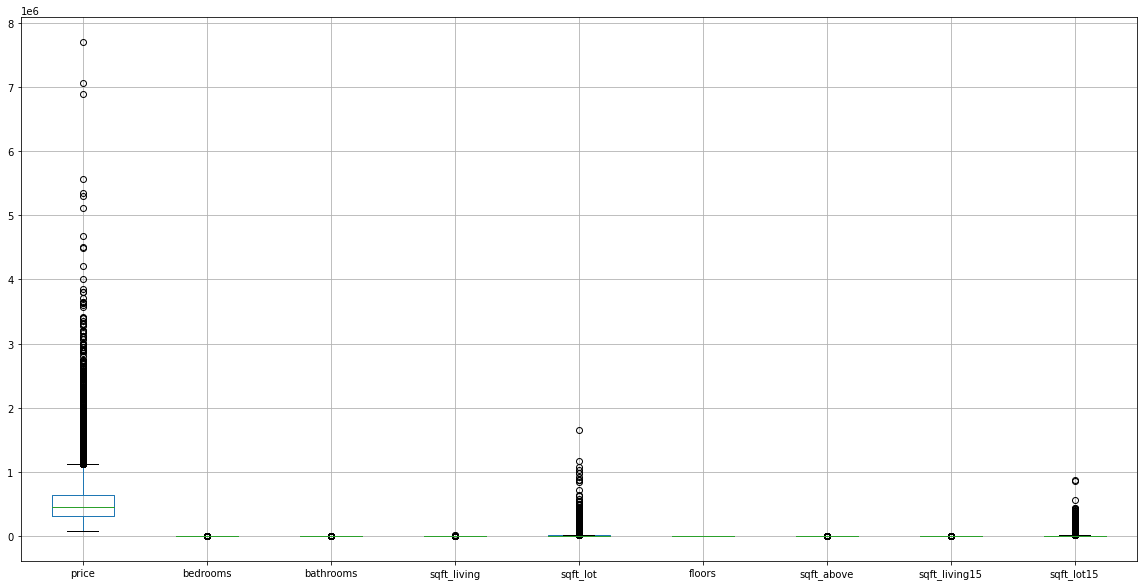

In [11]:
#checking for outliers
plt.figure(figsize=(20,10))
rel_house_data.boxplot()
plt.show()
#price,sqft_lot and sqft_lot15 have outliers

##### observation
The data has outliers but they seem genuine so we wont have to remove them

In [12]:
# Dataframe after dropping the columns we wont use  
rel_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  object 
 7   view           21597 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  sqft_living15  21597 non-null  int64  
 13  sqft_lot15     21597 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 2.3+ MB


In [13]:
rel_house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,No,NONE,Average,7 Average,1180,0.0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1800,7503


In [14]:
#Viewing unique values in the waterfront column
rel_house_data['waterfront'].value_counts()

NO     19075
No      2376
YES      146
Name: waterfront, dtype: int64

In [15]:
# Replacing No with NO
rel_house_data['waterfront'].replace('No','NO',inplace = True)

In [16]:
#Viewing the unique values in the view column
rel_house_data['view'].value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [17]:
# Replace None with NONE
rel_house_data['view'].replace('None','NONE',inplace=True)

In [18]:
#Viewing unique values in the condition column
rel_house_data['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [19]:
#Viewing unique values in the grade column
rel_house_data['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [20]:
# Viewing the data we are going to use
rel_house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1800,7503


In [21]:
# Returning the bedrooms and bathrooms to their original values
# Cleaned data
rel_house_data['bedrooms']=house_data['bedrooms']
rel_house_data['bathrooms']=house_data['bathrooms']
rel_house_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,NO,NONE,Average,8 Good,1600,0.0,1410,1287


In [22]:
rel_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  object 
 7   view           21597 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  sqft_living15  21597 non-null  int64  
 13  sqft_lot15     21597 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 2.3+ MB


# Data Analysis

In [23]:
#Checking the correlation between price and features of the house
rel_house_data.corr()['price']


price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
sqft_above       0.605368
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

Text(0, 0.5, 'price')

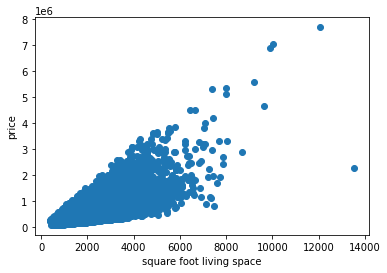

In [24]:
# Viewing the relationship between squarefoot of living and houseprice
fig,ax=plt.subplots()
plt.scatter(x='sqft_living',y='price',data=rel_house_data)
plt.xlabel('square foot living space')
plt.ylabel('price')

##### observation
this shows a linear relationship between price and square foot living space and even the correlation suggests a positive relationship with price

In [25]:
#Counting the number of sold houses per bedroom
number_of_houses_sold=rel_house_data['bedrooms'].value_counts()
number_of_houses_sold

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Text(0, 0.5, 'number_of_houses')

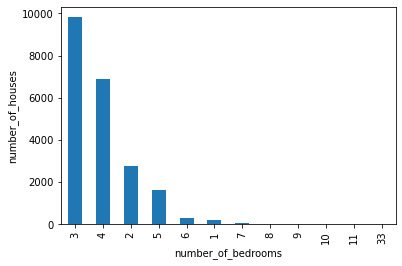

In [26]:
#Showing the number of sold houses per bedroom
number_of_houses_sold.plot.bar()
plt.xlabel('number_of_bedrooms')
plt.ylabel('number_of_houses')

##### observation
Houses with three bedrooms are sold more in KingCounty region

Text(0, 0.5, 'price')

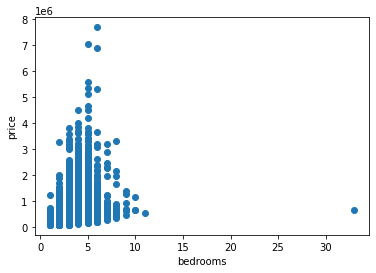

In [27]:
# Showing the relationship between bedrooms and houseprice
plt.scatter(house_data['bedrooms'],house_data['price'])
plt.xlabel('bedrooms')
plt.ylabel('price')

##### observation
Bedrooms is a categorical variable

Text(0.5, 0, 'bathrooms')

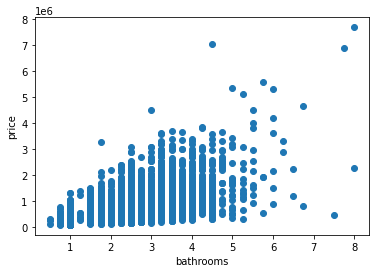

In [28]:
# Showing the relationship between bathrooms and houseprice
plt.scatter(house_data['bathrooms'],house_data['price'])
plt.ylabel('price')
plt.xlabel('bathrooms')

##### observation
This shows there is linear relationship between price and the number of bathrooms in a house

Text(0, 0.5, 'price')

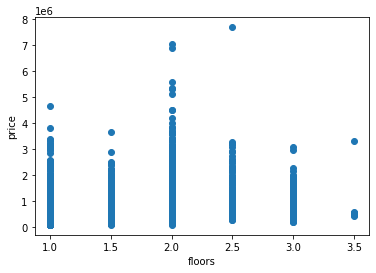

In [29]:
# Showing the relationship between floors and houseprice
plt.scatter(house_data['floors'],house_data['price'])
plt.xlabel('floors')
plt.ylabel('price')

The floors is a categorical variable

Text(0, 0.5, 'number_of_sales')

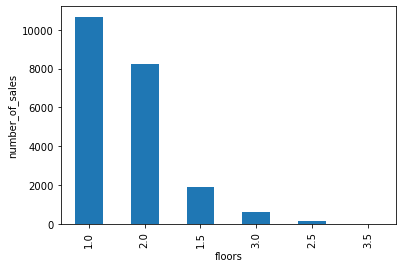

In [30]:
#Viewing the number of houses sold in terms of floors
rel_house_data['floors'].value_counts().plot.bar()
plt.xlabel('floors')
plt.ylabel('number_of_sales')

##### observation
The most sold houses have only one floor followed by houses with two floors

Text(0, 0.5, 'price')

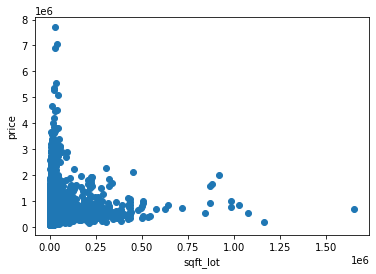

In [31]:
# Showing the relationship between squarefeet of the lot and houseprice
plt.scatter(rel_house_data['sqft_lot'],rel_house_data['price'])
plt.xlabel('sqft_lot')
plt.ylabel('price')

Text(0, 0.5, 'number_of_sales')

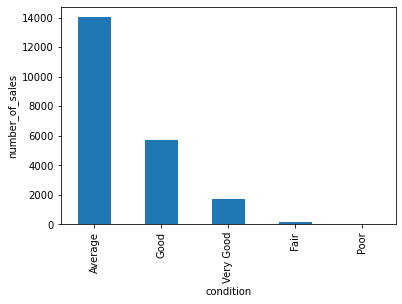

In [32]:
# Showing the relationship between condition and houseprice
rel_house_data['condition'].value_counts().plot.bar()
plt.xlabel('condition')
plt.ylabel('number_of_sales')

##### observation
Most sold houses have an average condition

Text(0, 0.5, 'number_of_sales')

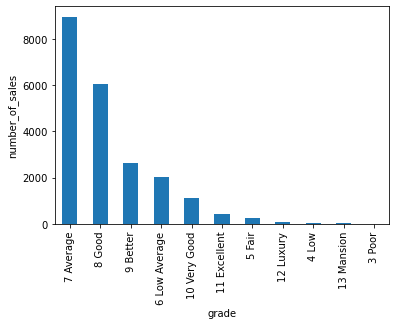

In [33]:
# Showing the relationship between grade and houseprice
house_data['grade'].value_counts().plot.bar()
plt.xlabel('grade')
plt.ylabel('number_of_sales')

Text(0, 0.5, 'price')

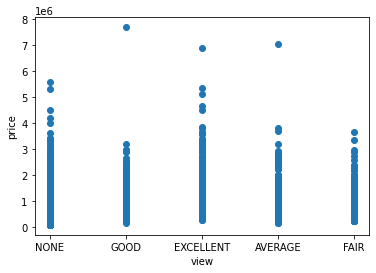

In [34]:
# Showing the relationship between the view and houseprice
plt.scatter(rel_house_data['view'],rel_house_data['price'])
plt.xlabel('view')
plt.ylabel('price')

##### observation
The view column is a categorical

In [35]:
#checking for multicollinearity in the predictors
abs(rel_house_data.drop(['price'],axis=1).corr())>0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False
sqft_living,False,True,True,False,False,True,True,False
sqft_lot,False,False,False,True,False,False,False,False
floors,False,False,False,False,True,False,False,False
sqft_above,False,False,True,False,False,True,False,False
sqft_living15,False,False,True,False,False,False,True,False
sqft_lot15,False,False,False,False,False,False,False,True


##### remedy for multicollinearity
From the above correlations we note that sqft living has above a correlation of 0.75/

with sqft_above,sqft_living15 and bathrooms

We will have to drop sqft_above and sqft_living15,bathrooms

In [36]:
# Remedy for multicollinearity
rel_house_data=rel_house_data.drop(['bathrooms'],axis=1)

In [37]:
#Checking to see if we have dropped the sqft_above and sqft_living15,bathrooms columns
rel_house_data.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Modelling

In [38]:
#Load the relevant libraries
import statsmodels.api as sm

## Simple multiple linear regression

In [39]:
# Formulating the dummy variables for  bedrooms,floors,
co1_rel_house=rel_house_data.copy()
co1_rel_house=co1_rel_house.drop(['price'],axis=1)
#Converting bedrooms,floors,bathrooms to category  
co1_rel_house['bedrooms']=co1_rel_house['bedrooms'].astype('category')
co1_rel_house['floors']=co1_rel_house['floors'].astype('category')

#finding
co1_rel_house=pd.get_dummies(co1_rel_house,columns=['bedrooms','floors'])
#Choosing the reference category as houses with three bedrooms and one floor
co1_rel_house=co1_rel_house.drop(['bedrooms_3','floors_1.0'],axis=1)


In [40]:
#Getting the dummy variables
co1_rel_house=pd.get_dummies(co1_rel_house,columns=['view','waterfront','condition','grade'],drop_first=True)


In [41]:
#Removing the sqft_basement column
co1_rel_house=co1_rel_house.drop(['sqft_basement'],axis=1)


In [42]:
#Viewing the contents to see the dummy variables
co1_rel_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   sqft_living          21597 non-null  int64
 1   sqft_lot             21597 non-null  int64
 2   sqft_above           21597 non-null  int64
 3   sqft_living15        21597 non-null  int64
 4   sqft_lot15           21597 non-null  int64
 5   bedrooms_1           21597 non-null  uint8
 6   bedrooms_2           21597 non-null  uint8
 7   bedrooms_4           21597 non-null  uint8
 8   bedrooms_5           21597 non-null  uint8
 9   bedrooms_6           21597 non-null  uint8
 10  bedrooms_7           21597 non-null  uint8
 11  bedrooms_8           21597 non-null  uint8
 12  bedrooms_9           21597 non-null  uint8
 13  bedrooms_10          21597 non-null  uint8
 14  bedrooms_11          21597 non-null  uint8
 15  bedrooms_33          21597 non-null  uint8
 16  floors_1.5           2

In [43]:
co1_rel_house.columns

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15',
       'bedrooms_1', 'bedrooms_2', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6',
       'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10', 'bedrooms_11',
       'bedrooms_33', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0',
       'floors_3.5', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE',
       'waterfront_YES', 'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better'],
      dtype='object')

In [44]:
Xs=co1_rel_house[['sqft_living', 'sqft_lot','sqft_lot15', 
                  'bedrooms_1', 'bedrooms_2', 'bedrooms_4', 'bedrooms_5',
                  'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10',
                  'bedrooms_11', 'bedrooms_33', 'floors_1.5', 'floors_2.0', 'floors_2.5',
                  'floors_3.0', 'floors_3.5', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD',
                  'view_NONE', 'waterfront_YES', 'condition_Fair', 'condition_Good',
                  'condition_Poor', 'condition_Very Good', 'grade_11 Excellent',
                  'grade_12 Luxury', 'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low',
                  'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
                  'grade_8 Good', 'grade_9 Better']]

In [45]:
model3=sm.OLS(endog=rel_house_data['price'],exog=sm.add_constant(Xs))
results3=model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     1082.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        08:28:38   Log-Likelihood:            -2.9587e+05
No. Observations:               21597   AIC:                         5.918e+05
Df Residuals:                   21558   BIC:                         5.921e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.677e+05    1.4e+04     40.492      0.000     5.4e+05    5.95e+05
sqft_living           163.8687      3.167     51.742      0.000     157.661     170.076
sqft_lot               -0.0455      0.051     -0.888      0.374      -0.146       0.055
sqft_lot15             -0.7153      0.078     -9.177      0.000      -0.868      -0.562
bedrooms_1           7.241e+04   1.63e+04      4.450      0.000    4.05e+04    1.04e+05
bedrooms_2           6.858e+04   4962.564     13.819      0.000    5.89e+04    7.83e+04
bedrooms_4          -2.917e+04   3788.765     -7.700      0.000   -3.66e+04   -2.17e+04
bedrooms_5          -9008.4725   6469.694     -1.392      0.164   -2.17e+04    3672.607
bedrooms_6          -1.047e+04   1.38e+04     -0.760      0.447   -3.75e+04    1.65e+04
bedrooms_7          -4.269e+04   3.55e+04     -1.203      0.229   -1.12e+05    2.69e+04
bedrooms_8           1.979e+05   6.04e+04      3.274      0.001    7.94e+04    3.16e+05
bedrooms_9           3.115e+04   8.85e+04      0.352      0.725   -1.42e+05    2.05e+05
bedrooms_10          1.588e+04   1.25e+05      0.127      0.899   -2.29e+05     2.6e+05
bedrooms_11         -3.347e+04   2.16e+05     -0.155      0.877   -4.56e+05    3.89e+05
bedrooms_33          1.655e+05   2.16e+05      0.767      0.443   -2.57e+05    5.88e+05
floors_1.5           8.359e+04   5415.013     15.437      0.000     7.3e+04    9.42e+04
floors_2.0          -3.043e+04   3890.791     -7.821      0.000   -3.81e+04   -2.28e+04
floors_2.5            1.58e+05   1.74e+04      9.056      0.000    1.24e+05    1.92e+05
floors_3.0           4.736e+04   9397.868      5.040      0.000    2.89e+04    6.58e+04
floors_3.5           1.193e+05   8.21e+04      1.452      0.146   -4.17e+04     2.8e+05
view_EXCELLENT       1.958e+05   1.64e+04     11.966      0.000    1.64e+05    2.28e+05
view_FAIR            6.444e+04   1.38e+04      4.673      0.000    3.74e+04    9.15e+04
view_GOOD            6.277e+04   1.19e+04      5.283      0.000    3.95e+04    8.61e+04
view_NONE           -8.584e+04   7274.090    -11.800      0.000      -1e+05   -7.16e+04
waterfront_YES        5.43e+05   2.19e+04     24.838      0.000       5e+05    5.86e+05
condition_Fair       2853.6525   1.68e+04      0.170      0.865   -3.01e+04    3.58e+04
condition_Good       4.472e+04   3587.552     12.465      0.000    3.77e+04    5.17e+04
condition_Poor       9441.9475   4.04e+04      0.234      0.815   -6.98e+04    8.87e+04
condition_Very Good  1.166e+05   5722.994     20.372      0.000    1.05e+05    1.28e+05
grade_11 Excellent   2.561e+05   1.28e+04     20.001      0.000    2.31e+05    2.81e+05
grade_12 Luxury      7.155e+05   2.45e+04     29.207      0.000    6.68e+05    7.64e+05
grade_13 Mansion     1.903e+06   6.14e+04     30.982      0.000    1.78e+06    2.02e+06
gra

In [46]:
#checkin for linearity of model3
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(results3)

(1.067022070426849, 0.0003797148296850165)

Since the pvalue is less than 0.05 we note that the model is not linear,we perform log transformation on the price column 

In [47]:
#Getting the logarithm of price column
rel_house_data['logprice']=np.log(rel_house_data['price'])

In [48]:
#Creating a log(target) model
model5=sm.OLS(endog=rel_house_data['logprice'],exog=sm.add_constant(Xs))
results5=model5.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     891.7
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        08:28:39   Log-Likelihood:                -6592.0
No. Observations:               21597   AIC:                         1.326e+04
Df Residuals:                   21558   BIC:                         1.357e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.1220      0.021    614.139      0.000      13.080      13.164
sqft_living             0.0002   4.83e-06     45.919      0.000       0.000       0.000
sqft_lot             1.174e-07    7.8e-08      1.506      0.132   -3.54e-08     2.7e-07
sqft_lot15          -7.441e-07   1.19e-07     -6.264      0.000   -9.77e-07   -5.11e-07
bedrooms_1              0.1068      0.025      4.309      0.000       0.058       0.155
bedrooms_2              0.1152      0.008     15.227      0.000       0.100       0.130
bedrooms_4             -0.0085      0.006     -1.473      0.141      -0.020       0.003
bedrooms_5              0.0005      0.010      0.055      0.956      -0.019       0.020
bedrooms_6             -0.0105      0.021     -0.498      0.618      -0.052       0.031
bedrooms_7             -0.1035      0.054     -1.914      0.056      -0.209       0.002
bedrooms_8              0.1578      0.092      1.714      0.087      -0.023       0.338
bedrooms_9              0.2207      0.135      1.637      0.102      -0.043       0.485
bedrooms_10             0.1541      0.190      0.811      0.417      -0.218       0.527
bedrooms_11             0.1362      0.329      0.414      0.679      -0.508       0.781
bedrooms_33             0.4320      0.329      1.314      0.189      -0.212       1.076
floors_1.5              0.1843      0.008     22.335      0.000       0.168       0.200
floors_2.0             -0.0262      0.006     -4.413      0.000      -0.038      -0.015
floors_2.5              0.1452      0.027      5.464      0.000       0.093       0.197
floors_3.0              0.1002      0.014      6.997      0.000       0.072       0.128
floors_3.5              0.0896      0.125      0.716      0.474      -0.156       0.335
view_EXCELLENT          0.1583      0.025      6.349      0.000       0.109       0.207
view_FAIR               0.0766      0.021      3.647      0.000       0.035       0.118
view_GOOD               0.0404      0.018      2.232      0.026       0.005       0.076
view_NONE              -0.1515      0.011    -13.664      0.000      -0.173      -0.130
waterfront_YES          0.3399      0.033     10.204      0.000       0.275       0.405
condition_Fair         -0.1122      0.026     -4.377      0.000      -0.162      -0.062
condition_Good          0.0698      0.005     12.768      0.000       0.059       0.081
condition_Poor         -0.0541      0.062     -0.879      0.379      -0.175       0.067
condition_Very Good     0.1911      0.009     21.918      0.000       0.174       0.208
grade_11 Excellent      0.1035      0.020      5.304      0.000       0.065       0.142
grade_12 Luxury         0.1897      0.037      5.080      0.000       0.116       0.263
grade_13 Mansion        0.2551      0.094      2.725      0.006       0.072       0.439
gra

In [49]:
#checking linearity of log(price) model
linear_rainbow(results5)

(0.9520748679837333, 0.994603783410588)

The log(price) model is linear 

## checking for normality
Since the Prob(JB):0.0299 is less than 0.05 the distribution is not normal

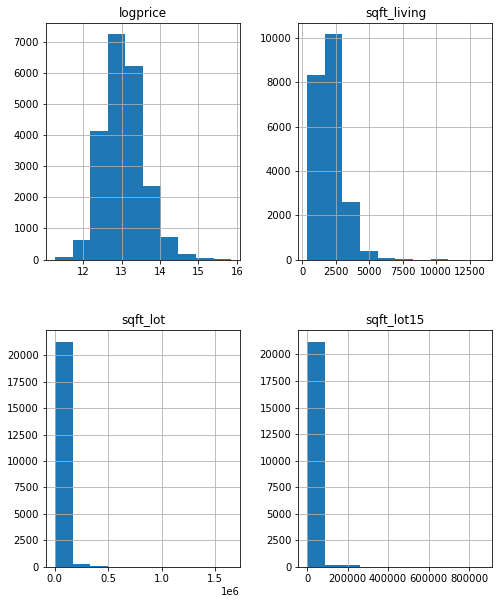

In [50]:
#Treating for normality
rel_house_data[['logprice','sqft_living','sqft_lot','sqft_lot15']]\
.hist(figsize=(8,10));

In [51]:
rel_house_data['log_sqft_living']=np.log(rel_house_data['sqft_living'])
rel_house_data['log_sqft_lot']=np.log(rel_house_data['sqft_lot'])
rel_house_data['log_sqft_lot15']=np.log(rel_house_data['sqft_lot15'])

array([[<AxesSubplot:title={'center':'log_sqft_living'}>,
        <AxesSubplot:title={'center':'log_sqft_lot'}>],
       [<AxesSubplot:title={'center':'log_sqft_lot15'}>, <AxesSubplot:>]],
      dtype=object)

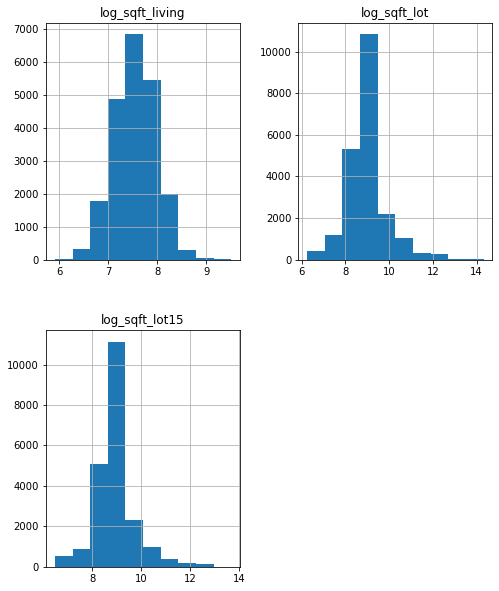

In [52]:
rel_house_data[['log_sqft_living','log_sqft_lot','log_sqft_lot15']]\
 .hist(figsize=(8,10))

The log of sqft_living,sqft_lot,sqft_lot15 are normally distributed

In [53]:
#adding the columns
co1_rel_house['log_sqft_living']=np.log(rel_house_data['sqft_living'])
co1_rel_house['log_sqft_lot']=np.log(rel_house_data['sqft_lot'])
co1_rel_house['log_sqft_lot15']=np.log(rel_house_data['sqft_lot15'])
#the new independent variables
Xs1=co1_rel_house[['log_sqft_living', 'log_sqft_lot','log_sqft_lot15', 
                  'bedrooms_1', 'bedrooms_2', 'bedrooms_4', 'bedrooms_5',
                  'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10',
                  'bedrooms_11', 'bedrooms_33', 'floors_1.5', 'floors_2.0', 'floors_2.5',
                  'floors_3.0', 'floors_3.5', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD',
                  'view_NONE', 'waterfront_YES', 'condition_Fair', 'condition_Good',
                  'condition_Poor', 'condition_Very Good', 'grade_11 Excellent',
                  'grade_12 Luxury', 'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low',
                  'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
                  'grade_8 Good', 'grade_9 Better']]

#generating the log-log model
model6=sm.OLS(endog=rel_house_data['logprice'],exog=sm.add_constant(Xs1))
results6=model6.fit()
results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     913.2
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        08:28:45   Log-Likelihood:                -6433.5
No. Observations:               21597   AIC:                         1.295e+04
Df Residuals:                   21558   BIC:                         1.326e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.3462      0.083    124.826      0.000      10.184      10.509
log_sqft_living         0.5123      0.010     48.837      0.000       0.492       0.533
log_sqft_lot           -0.0111      0.006     -1.741      0.082      -0.024       0.001
log_sqft_lot15         -0.0518      0.007     -7.428      0.000      -0.065      -0.038
bedrooms_1              0.2097      0.025      8.413      0.000       0.161       0.259
bedrooms_2              0.1461      0.008     18.800      0.000       0.131       0.161
bedrooms_4             -0.0168      0.006     -2.911      0.004      -0.028      -0.005
bedrooms_5              0.0077      0.010      0.802      0.423      -0.011       0.027
bedrooms_6              0.0102      0.021      0.495      0.621      -0.030       0.051
bedrooms_7             -0.0187      0.053     -0.350      0.727      -0.123       0.086
bedrooms_8              0.1975      0.091      2.163      0.031       0.019       0.377
bedrooms_9              0.2318      0.134      1.733      0.083      -0.030       0.494
bedrooms_10             0.1962      0.189      1.040      0.298      -0.173       0.566
bedrooms_11             0.1169      0.326      0.358      0.720      -0.523       0.757
bedrooms_33             0.3923      0.326      1.202      0.229      -0.247       1.032
floors_1.5              0.1535      0.008     18.579      0.000       0.137       0.170
floors_2.0             -0.0597      0.006     -9.744      0.000      -0.072      -0.048
floors_2.5              0.1007      0.027      3.793      0.000       0.049       0.153
floors_3.0              0.0174      0.015      1.160      0.246      -0.012       0.047
floors_3.5              0.0202      0.124      0.163      0.871      -0.223       0.264
view_EXCELLENT          0.1622      0.025      6.556      0.000       0.114       0.211
view_FAIR               0.0736      0.021      3.527      0.000       0.033       0.114
view_GOOD               0.0472      0.018      2.627      0.009       0.012       0.082
view_NONE              -0.1519      0.011    -13.808      0.000      -0.173      -0.130
waterfront_YES          0.3801      0.033     11.482      0.000       0.315       0.445
condition_Fair         -0.0885      0.025     -3.473      0.001      -0.138      -0.039
condition_Good          0.0756      0.005     13.892      0.000       0.065       0.086
condition_Poor         -0.0477      0.061     -0.781      0.435      -0.168       0.072
condition_Very Good     0.1875      0.009     21.649      0.000       0.171       0.204
grade_11 Excellent      0.1965      0.019     10.274      0.000       0.159       0.234
grade_12 Luxury         0.4259      0.036     11.721      0.000       0.355       0.497
grade_13 Mansion        0.7673      0.092      8.378      0.000       0.588       0.947
gra

The distribution is normal since Prob(JB):0.104 is greater than 0.05

In [54]:
#checking for linearity
linear_rainbow(results6)
#model is linear

(0.959546942939999, 0.9839664345942137)

In [55]:
#checking for multicollinearity
Xs1.corr()>0.75

,log_sqft_living,log_sqft_lot,log_sqft_lot15,bedrooms_1,bedrooms_2,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
log_sqft_living,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
log_sqft_lot,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
log_sqft_lot15,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms_1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms_2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms_4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms_5,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms_6,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms_7,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms_8,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


##### observation
The column of log_sqft_lot and log_sqft_lot15 has high correlation this showing a problem of multicollinearity .We will remove the log_sqft_lot15

In [56]:
#log log model 
Xs2=Xs1.drop(['log_sqft_lot15'],axis=1)
model7=sm.OLS(endog=rel_house_data['logprice'],exog=sm.add_constant(Xs2))
results7=model7.fit()
results7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     934.1
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        08:28:46   Log-Likelihood:                -6461.1
No. Observations:               21597   AIC:                         1.300e+04
Df Residuals:                   21559   BIC:                         1.330e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.2494      0.082    125.059      0.000      10.089      10.410
log_sqft_living         0.5133      0.011     48.882      0.000       0.493       0.534
log_sqft_lot           -0.0533      0.003    -18.053      0.000      -0.059      -0.048
bedrooms_1              0.2088      0.025      8.368      0.000       0.160       0.258
bedrooms_2              0.1480      0.008     19.040      0.000       0.133       0.163
bedrooms_4             -0.0161      0.006     -2.795      0.005      -0.027      -0.005
bedrooms_5              0.0091      0.010      0.938      0.348      -0.010       0.028
bedrooms_6              0.0155      0.021      0.750      0.453      -0.025       0.056
bedrooms_7             -0.0100      0.053     -0.186      0.852      -0.115       0.095
bedrooms_8              0.2056      0.091      2.249      0.025       0.026       0.385
bedrooms_9              0.2448      0.134      1.828      0.068      -0.018       0.507
bedrooms_10             0.1964      0.189      1.040      0.298      -0.174       0.566
bedrooms_11             0.1185      0.327      0.363      0.717      -0.522       0.759
bedrooms_33             0.4072      0.327      1.246      0.213      -0.233       1.048
floors_1.5              0.1568      0.008     18.986      0.000       0.141       0.173
floors_2.0             -0.0587      0.006     -9.576      0.000      -0.071      -0.047
floors_2.5              0.1054      0.027      3.968      0.000       0.053       0.158
floors_3.0              0.0225      0.015      1.496      0.135      -0.007       0.052
floors_3.5              0.0349      0.124      0.280      0.779      -0.209       0.279
view_EXCELLENT          0.1617      0.025      6.525      0.000       0.113       0.210
view_FAIR               0.0718      0.021      3.440      0.001       0.031       0.113
view_GOOD               0.0466      0.018      2.590      0.010       0.011       0.082
view_NONE              -0.1526      0.011    -13.855      0.000      -0.174      -0.131
waterfront_YES          0.3724      0.033     11.240      0.000       0.307       0.437
condition_Fair         -0.0841      0.025     -3.299      0.001      -0.134      -0.034
condition_Good          0.0741      0.005     13.600      0.000       0.063       0.085
condition_Poor         -0.0332      0.061     -0.543      0.587      -0.153       0.087
condition_Very Good     0.1867      0.009     21.530      0.000       0.170       0.204
grade_11 Excellent      0.1961      0.019     10.240      0.000       0.159       0.234
grade_12 Luxury         0.4256      0.036     11.699      0.000       0.354       0.497
grade_13 Mansion        0.7676      0.092      8.370      0.000       0.588       0.947
grade_3 Poor           -0.7214      0.328     -2.199      0.028      -1.364      -0.078
gra

In [57]:
##### checking for linearity
linear_rainbow(results7)

(0.959654816221589, 0.9837329631779078)

In [58]:
#checking for multicollinearity
(Xs2.corr()>0.75).sum()

log_sqft_living        1
log_sqft_lot           1
bedrooms_1             1
bedrooms_2             1
bedrooms_4             1
bedrooms_5             1
bedrooms_6             1
bedrooms_7             1
bedrooms_8             1
bedrooms_9             1
bedrooms_10            1
bedrooms_11            1
bedrooms_33            1
floors_1.5             1
floors_2.0             1
floors_2.5             1
floors_3.0             1
floors_3.5             1
view_EXCELLENT         1
view_FAIR              1
view_GOOD              1
view_NONE              1
waterfront_YES         1
condition_Fair         1
condition_Good         1
condition_Poor         1
condition_Very Good    1
grade_11 Excellent     1
grade_12 Luxury        1
grade_13 Mansion       1
grade_3 Poor           1
grade_4 Low            1
grade_5 Fair           1
grade_6 Low Average    1
grade_7 Average        1
grade_8 Good           1
grade_9 Better         1
dtype: int64

##### multicollinearity 
There is no multicollinearity issue since there is correlation between the predictors that is greater than 0.75

##### normality
The model has normal distribution since the Prob(JB):0.0850 is greater than 0.05

In [59]:
#checking for heteroskedasticity
from statsmodels.stats.diagnostic import het_goldfeldquandt
het_goldfeldquandt(rel_house_data['logprice'],Xs2,alternative='two-sided')

(0.9447246071338734, 0.0031842866378877866, 'two-sided')

##### observation for heteroskedasticity
The data is heteroscedastic,though we can assume constant variance since it is normally distributed and the error terms are normally distributed

##### model explanation
The final model used is a log log multilinear regression model with the target as the log of price and the independent variable are the log of sqft of living and log of sqft of lot and contains the dummy variables of the bedroom columns,view,waterfront,grade and condition column.The model7 is linear,homoskedastic,independent and normally distributed.It passes all the assumptions of a linear regression.The independent variable chosen are what most peaople value in a house and its the house major features.

## Model Results

### Model diagnostic

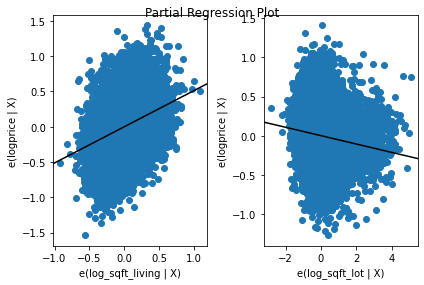

In [60]:
#partial regression plots for logprice to log_sqft_living and log_sqft_lot
sm.graphics.plot_partregress_grid(results7,exog_idx=['log_sqft_living','log_sqft_lot']);

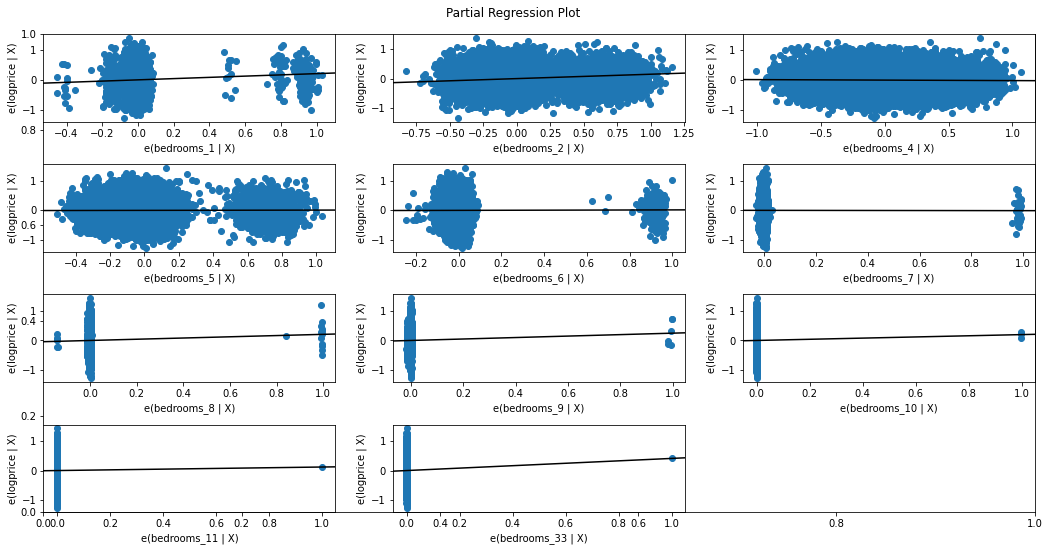

In [61]:
#partial regression of the dummy variable for the bedrooms column
fig,ax=plt.subplots(figsize=(15,8))
sm.graphics.plot_partregress_grid(results7,exog_idx=['bedrooms_1', 'bedrooms_2', 'bedrooms_4', 'bedrooms_5',
                                                      'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10',
                                                      'bedrooms_11', 'bedrooms_33'],
                                   grid=(4,3),
                                   fig=fig)
plt.tight_layout();

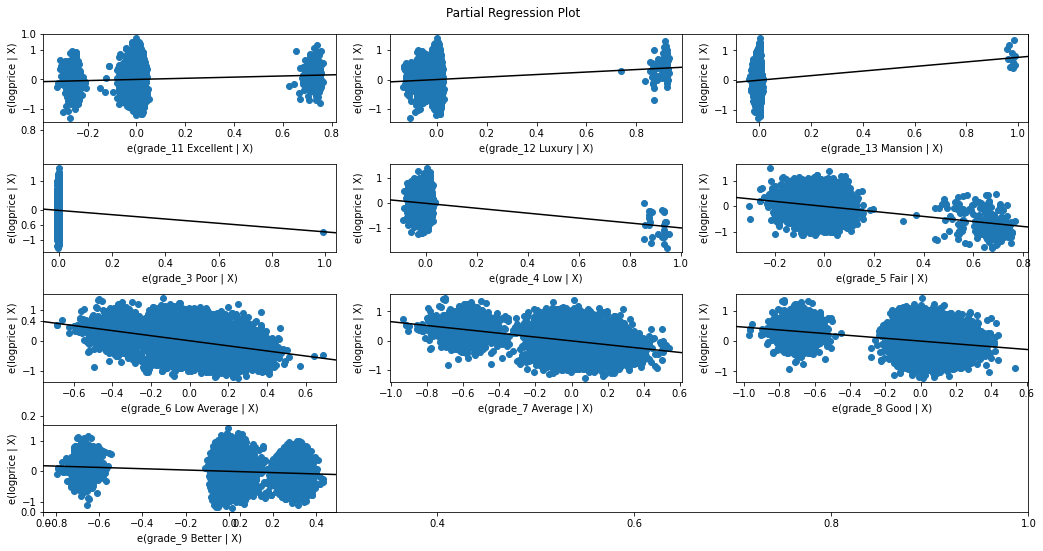

In [62]:
#Partial regression plots for the grade dummy variables
fig,ax=plt.subplots(figsize=(15,8))
sm.graphics.plot_partregress_grid(results7,exog_idx=['grade_11 Excellent','grade_12 Luxury', 'grade_13 Mansion',
                                                     'grade_3 Poor', 'grade_4 Low','grade_5 Fair',
                                                     'grade_6 Low Average', 'grade_7 Average',
                                                      'grade_8 Good', 'grade_9 Better'],
                                   grid=(4,3),
                                   fig=fig)
plt.tight_layout();

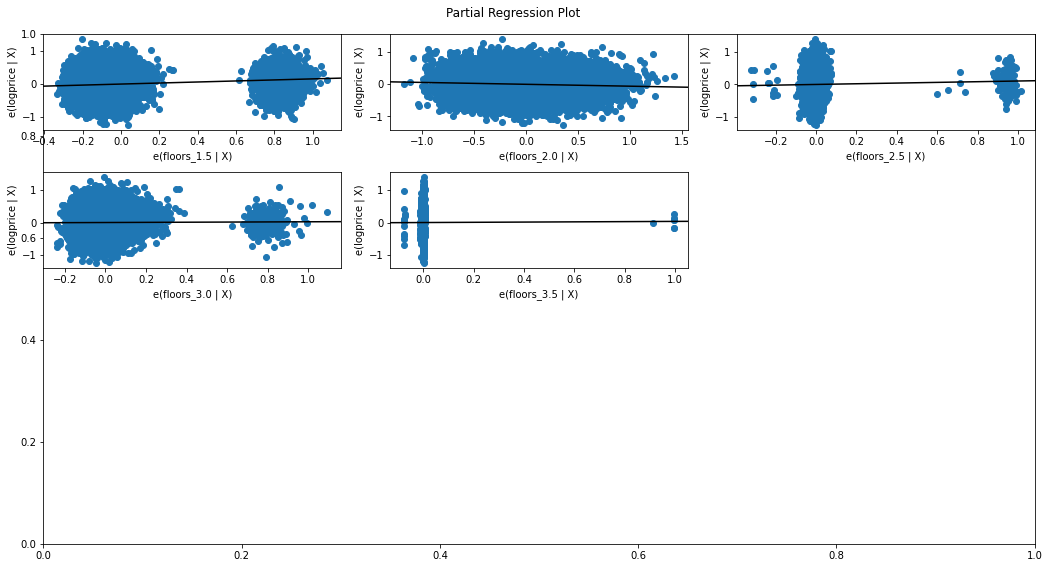

In [63]:
#partial regression of the dummy variable for the floors column
fig,ax=plt.subplots(figsize=(15,8))
sm.graphics.plot_partregress_grid(results7,exog_idx=['floors_1.5', 'floors_2.0', 'floors_2.5',
                                                      'floors_3.0', 'floors_3.5'],
                                                       grid=(4,3),
                                                       fig=fig)
plt.tight_layout();

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
predictions=results7.predict(sm.add_constant(Xs2))
rms=mean_squared_error(rel_house_data['logprice'],predictions,squared=False)
rms

0.3263543028622272

##### model explanation
The final model used is a log log multilinear regression model with the target as the log of price and the independent variable are the log of sqft of living and log of sqft of lot and contains the dummy variables of the bedroom columns,view,waterfront,grade and condition column.The model7 is linear,homoskedastic,independent and normally distributed.It passes all the assumptions of a linear regression.The independent variable chosen are what most peaople value in a house and its the house major features.

###  Model Metrics
The model7 is statistically significant at alpha=0.05

The model explains 61.5% of variations in the logofprice

The model is off from the log of price by 0.3263 in average prediction

### Model Interpretation


In [65]:
results7df=pd.concat([results7.params,results7.pvalues],axis=1)
results7df.columns=['coefficient','p_value']
results7df

,coefficient,p_value
const,10.249368,0.000000e+00
log_sqft_living,0.513341,0.000000e+00
log_sqft_lot,-0.053335,2.536083e-72
bedrooms_1,0.208808,6.221180e-17
bedrooms_2,0.148013,3.644737e-80
bedrooms_4,-0.016143,5.191114e-03
bedrooms_5,0.009072,3.481494e-01
bedrooms_6,0.015533,4.529632e-01
bedrooms_7,-0.009959,8.522543e-01
bedrooms_8,0.205649,2.450521e-02


In [66]:
# showing the statistical significant coefficient
results7df=results7df[results7df['p_value']<0.05].sort_values(by="coefficient")
results7df

,coefficient,p_value
grade_4 Low,-0.986521,2.589107e-50
grade_5 Fair,-0.977775,5.782179e-297
grade_6 Low Average,-0.829789,0.000000e+00
grade_3 Poor,-0.721393,2.790658e-02
grade_7 Average,-0.651175,0.000000e+00
grade_8 Good,-0.459732,0.000000e+00
grade_9 Better,-0.214522,2.154767e-73
view_NONE,-0.152584,1.819092e-43
condition_Fair,-0.084112,9.733340e-04
floors_2.0,-0.058736,1.114192e-21


##### Coefficient  interpretation

An increase in square foot of living by one percent increase the price by 0.51%

An increase in square foot of lot by one percent reduces the price by 0.05%

The sale price of 1 bedroom house is higher than of a three bedroom house by 0.21%

The sale price of 8 bedroom house is higher than of a three bedroom house by 0.21%

The sale price of 2 bedroom house is higher than of a three bedroom house by 0.15%

The sale price of 4 bedroom house is lesser than of a three bedroom house by 0.02%

The sale price of 1.5 floors house is higher than of one floor house by 0.16%

The sale price of 2.0 floors house is less than of one floor house by 0.06%

The sale price of 2.5 floors house is higher than of one floor house by 0.11%

The sale price of house with a waterfront  is higher than a house with no waterfront by 0.37%

The sale price of a house with a good view is higher than of a house with an average view by 0.05%

The sale price of a house with a excellent view is higher than of a house with an average view by 0.16%

The sale price of a house with a fair view is higher than of a house with an average view by 0.07%

the sale price of a house with no view is less than of a house with an average view by 0.15%

the sale price of a house with a good condition is higher than of a house with an average condition by 0.07%

the sale price of a house with a verygood condition is higher than of a house with an average condition by 0.19%

The sale price of a house with a poor condition is less than of a house with an average condition by 0.03%

The sale price of a house with a fair condition is less than of a house with an average condition by 0.08%

The sale price of a house with a 7 Average grade is less than of a house with a 10 Verygood grade by 0.65%

The sale price of a house with a 8 Good grade is less than of a house with a 10 Verygood grade by 0.46%

The sale price of a house with a 9 Better grade is less than of a house with an a 10 Verygood grade by 0.21%

The sale price of a house wit a 6 Low Average grade is less than of a house with an a 10 Verygood grade by 0.83%

The sale price of a house with a 11 Excellent grade is higher than of a house with a 10 Verygood grade by 0.20%

The sale price of a house with a 5 Fair grade is less than of a house with a 10 Verygood grade by 0.98%

The sale price of a house with a 12 Luxury grade is higher than of a house with a 10 Verygood grade by 0.43%

The sale price of a house with a 4 Low grade  is less than of a house with a 10 Verygood grade by 0.99%

The sale price of a house with a 13 Mansion grade is higher than of a house with a 10 Verygood grade by 0.77%

The sale price of a house with a 3 poor grade  is less than of a house with a 10 Verygood grade by 0.72%



#### recommendation


For a realestate agent trying to purchase a house should consider that a house with a waterfront has a higher price than a house with no waterfront

For a homeowner to assess price of their home shold take into account the square feet living space,square feet of lot,Grade,Condition,bedrooms of the property

For a realestate agent trying to purchase a house should consider that a house with a no view has a lower price than a house with good,excellent,average views

For a homeowner trying to assess the value of their house the square feet of living space has a higher impact on price than the square feet of lot

The most sold houses have three bedrooms,showing a high demand in three bedroom houses

The most sold houses have one floor also showing a high demand in houses with one floor